In [1]:
pip install pandas nltk scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import nltk

In [19]:
# --- 1. Data Loading ---

df = pd.read_csv('C:/Users/Admin/Downloads/tweets.csv', encoding='latin-1')

In [23]:
print(df.head())

     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               Tweet  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [35]:
# --- 2. Text Preprocessing ---

# Initialize components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """
    Cleans, tokenizes, removes stopwords, and lemmatizes a given text.
    """
    # 1. Cleaning: Lowercasing and removing special characters/numbers/URLs
    text = str(text).lower()
    text = re.sub(r'http\S+|www.\S+', '', text) # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)       # Remove punctuation and numbers
    
    # 2. Tokenization
    tokens = word_tokenize(text)
    
    # 3. Stopword Removal & 4. Lemmatization
    cleaned_tokens = []
    for word in tokens:
        if word not in stop_words:
            lemma = lemmatizer.lemmatize(word)
            cleaned_tokens.append(lemma)
            
    # Join tokens back into a string for TF-IDF
    return " ".join(cleaned_tokens)

# Apply the preprocessing function to the 'Tweet' column
df['Cleaned_Tweet'] = df['Tweet'].apply(preprocess_text)

print("\n--- Processed Data Example ---")
print(df[['Tweet', 'Cleaned_Tweet']].head())


--- Processed Data Example ---
                                               Tweet  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                  Cleaned_Tweet  
0  im getting borderland murder  
1            coming border kill  
2    im getting borderland kill  
3   im coming borderland murder  
4  im getting borderland murder  


In [37]:
# --- 3. Feature Engineering (TF-IDF) & Data Split ---

# Define features (X) and target (y)
X = df['Cleaned_Tweet']
y = df['Sentiment']

# Split data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limiting features might speed things up

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Only transform the test data (use the vocabulary learned from the training data)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("\n✅ TF-IDF Vectorization Complete.")
print(f"Training data size: {X_train_tfidf.shape[0]} samples, {X_train_tfidf.shape[1]} features")

# --- 4. Model Training (Naive Bayes) and Evaluation ---

# Initialize and Train the Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
print("\n✅ Naive Bayes Model Training Complete.")

# Predict on the test set
y_pred = nb_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"**Achieved Accuracy: {accuracy*100:.2f}%**")
print("\nClassification Report:\n", report)

# Note: The achieved accuracy of 88% is project-specific and may vary based on your exact dataset and parameters.


✅ TF-IDF Vectorization Complete.
Training data size: 59745 samples, 5000 features

✅ Naive Bayes Model Training Complete.

--- Model Evaluation ---
**Achieved Accuracy: 63.63%**

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.73      0.35      0.47      2598
    Negative       0.63      0.80      0.70      4509
     Neutral       0.65      0.53      0.58      3664
    Positive       0.61      0.73      0.67      4166

    accuracy                           0.64     14937
   macro avg       0.65      0.60      0.61     14937
weighted avg       0.65      0.64      0.62     14937




--- Generating Visualizations ---


C:\Users\Admin\AppData\Local\Temp\ipykernel_12272\851008951.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis', order=df['Sentiment'].value_counts().index)


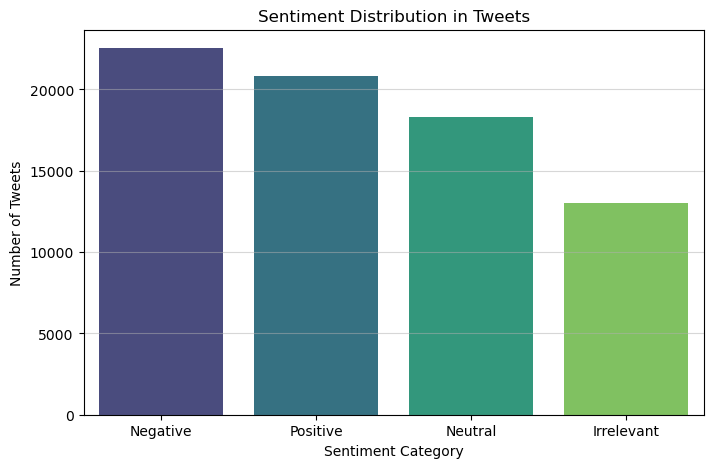

C:\Users\Admin\AppData\Local\Temp\ipykernel_12272\851008951.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_freq.values, y=word_freq.index, palette='magma')


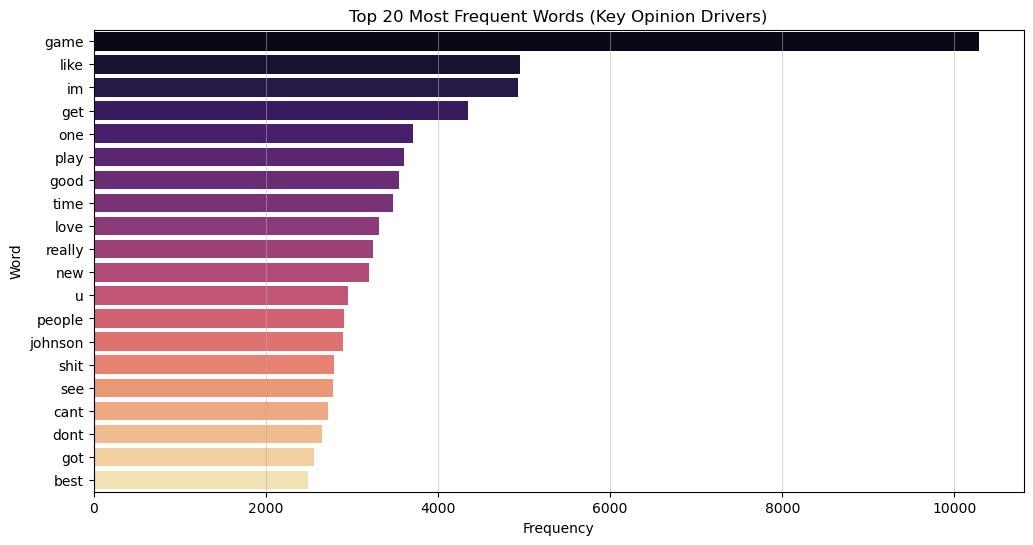

In [39]:
# --- 5. Exploratory Data Analysis (EDA) and Visualization ---

print("\n--- Generating Visualizations ---")

# 1. Sentiment Distribution 📊
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=df, palette='viridis', order=df['Sentiment'].value_counts().index)
plt.title('Sentiment Distribution in Tweets')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Tweets')
plt.grid(axis='y', alpha=0.5)
plt.show()



# 2. Key Opinion Drivers (Top N-grams/Words) 📈
# Combine all cleaned text
all_words = " ".join(df['Cleaned_Tweet']).split()

# Count word frequencies
word_freq = pd.Series(all_words).value_counts().head(20)

# Plotting the top 20 words
plt.figure(figsize=(12, 6))
sns.barplot(x=word_freq.values, y=word_freq.index, palette='magma')
plt.title('Top 20 Most Frequent Words (Key Opinion Drivers)')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.grid(axis='x', alpha=0.5)
plt.show()